In [1]:
import spacy
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# load the different Spacy models
nlp_lg = spacy.load("en_core_web_lg")

In [3]:
# Read the phrases CSV into a dataframe
df = pd.read_csv("../data/verb_noun_phrases.csv")
df

,Phrases
0,leads cross-functional teams
1,Manages overall product health
2,achieve broad adoption
3,protected by law
4,working across global markets
...,...
668,incorporated into analytic approaches
669,experience accessing data
670,experience using programming
671,scale distributed computing environments


In [4]:
vectorized_phrases = np.stack([nlp_lg(p).vector for p in df["Phrases"]])

## Find the ideal number of clusters using the SEE Elbow & Silhouette Coefficients

In [5]:
from kneed import KneeLocator

In [6]:
MIN_N = 4
MAX_N = 16

kmeans_kwargs = {
    "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 1
}

sse = []
for k in range(MIN_N,MAX_N):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(vectorized_phrases)
    sse.append(kmeans.inertia_)

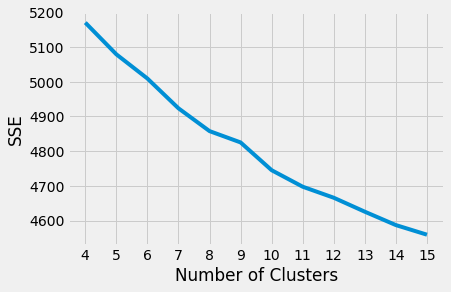

In [7]:
plt.style.use("fivethirtyeight")
plt.plot(range(MIN_N,MAX_N), sse)
plt.xticks(range(MIN_N,MAX_N))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [8]:
knee = KneeLocator(range(MIN_N, MAX_N), sse, curve="convex", direction="decreasing")
knee.elbow

10

In [9]:
silhouette_coefficients = []

for k in range(MIN_N,MAX_N):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(vectorized_phrases)
    score = silhouette_score(vectorized_phrases, kmeans.labels_)
    silhouette_coefficients.append(score)

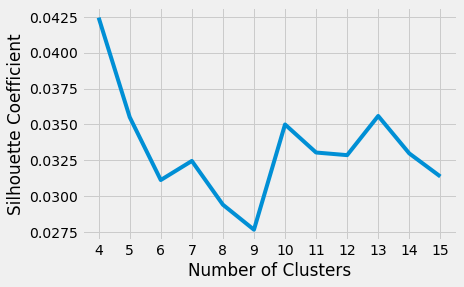

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(MIN_N, MAX_N), silhouette_coefficients)
plt.xticks(range(MIN_N, MAX_N))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The SSE elbow and silhouette coefficient didn't declare a clear winner number of clusters. I decided to use 10 for now and look deeper into the data.

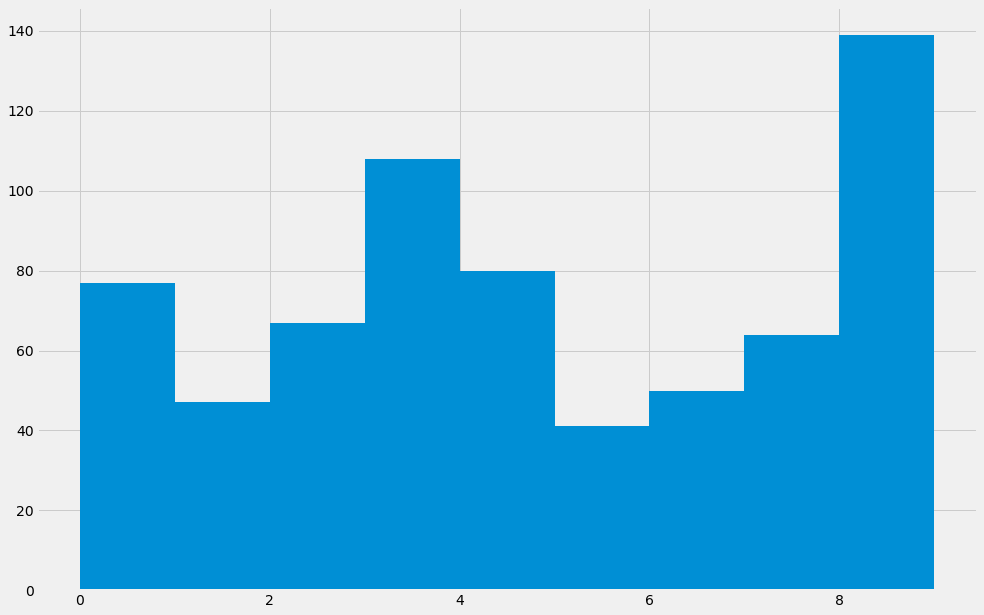

In [11]:
k = 10
kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(vectorized_phrases)
prediction = kmeans.predict(vectorized_phrases)
plt.figure(figsize=(15,10))
plt.hist(prediction, bins=range(k))
plt.show()

In [14]:
prediction

array([3, 4, 7, 2, 9, 2, 9, 3, 4, 9, 3, 4, 3, 2, 5, 2, 0, 4, 2, 9, 9, 4,
       4, 4, 5, 9, 3, 4, 9, 2, 3, 9, 4, 4, 7, 3, 2, 1, 6, 7, 4, 9, 3, 3,
       2, 1, 3, 3, 3, 5, 9, 0, 9, 5, 7, 4, 9, 2, 3, 9, 3, 5, 9, 3, 8, 5,
       4, 3, 7, 0, 1, 5, 0, 0, 3, 3, 4, 9, 0, 1, 3, 2, 9, 3, 4, 3, 3, 0,
       0, 4, 2, 0, 7, 3, 9, 3, 9, 5, 5, 0, 5, 8, 8, 4, 7, 4, 4, 6, 9, 8,
       4, 5, 7, 9, 4, 0, 4, 7, 6, 5, 3, 3, 9, 1, 2, 7, 9, 3, 2, 4, 9, 0,
       2, 9, 5, 0, 9, 3, 1, 3, 4, 4, 9, 9, 7, 7, 9, 4, 8, 5, 3, 2, 2, 0,
       3, 3, 1, 3, 7, 3, 3, 9, 7, 3, 7, 6, 4, 2, 9, 3, 3, 4, 1, 7, 8, 8,
       2, 7, 9, 9, 4, 3, 9, 4, 2, 7, 4, 4, 1, 1, 4, 7, 5, 9, 9, 4, 7, 2,
       3, 6, 7, 0, 0, 1, 9, 4, 3, 7, 6, 3, 6, 2, 3, 7, 9, 7, 1, 7, 7, 8,
       2, 7, 2, 7, 9, 3, 4, 6, 3, 0, 2, 2, 3, 7, 4, 3, 6, 3, 0, 7, 9, 3,
       2, 0, 6, 0, 6, 9, 4, 2, 4, 4, 9, 2, 2, 7, 4, 4, 4, 0, 4, 0, 7, 0,
       9, 9, 0, 7, 2, 9, 7, 7, 6, 0, 6, 4, 7, 9, 9, 1, 4, 3, 6, 3, 0, 7,
       3, 3, 2, 4, 0, 2, 3, 0, 6, 6, 5, 0, 4, 1, 7,

### Looking into the data to see how the well Kmeans did

In [55]:
df

,Phrases
0,leads cross-functional teams
1,Manages overall product health
2,achieve broad adoption
3,protected by law
4,working across global markets
...,...
668,incorporated into analytic approaches
669,experience accessing data
670,experience using programming
671,scale distributed computing environments


In [56]:
df["Cluster"] = df.index.to_series().apply(lambda g: prediction[g])
df.head()

,Phrases,Cluster
0,leads cross-functional teams,3
1,Manages overall product health,4
2,achieve broad adoption,7
3,protected by law,2
4,working across global markets,9


In [58]:
dfc = df.groupby(["Cluster"])


In [93]:
[x for x in dfc.get_group(9)["Phrases"]][:10]

['working across global markets',
 'leading through influence',
 'works with product development teams',
 'organization with demonstrated ability',
 'experience managing teams',
 'working with relevant stakeholders',
 'working with technology',
 'involve multiple stakeholder teams',
 'experience leading project',
 'individual manages people']

In [85]:
for p in dfc.get_group(2)["Phrases"]:
    print(p)

protected by law
participate in certain work
vaccinated against COVID-19
adoption within identified segments
work -related activities
protected under applicable law
serves through programs
responsibility for setting individual
given current COVID19 restrictions
depending on COVID-19 related restrictions
plans into phased actions
considered in substitution
influence without authority
Use excellent judgment
ensuring appropriate coverage
practice active listening
desire competitive compensation
activate corrective plans
sales by conducting training
participate in panel discussions
held religious belief
change by transforming healthcare
lives by making healthcare
act as adviser
adhered to in accordance
pay including pay
have primary responsibility
Participates on engagements
related to practice area
act with integrity
required in completion
positions require applicants
accommodate special meeting requests
implemented in accordance
suspended until further notice
practices by conducting POCs

In [77]:
tsne_model = TSNE(perplexity=30, n_components=3, init='pca', n_iter=2500, random_state=23)
compress_vectors = tsne_model.fit_transform(vectorized_phrases)

/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


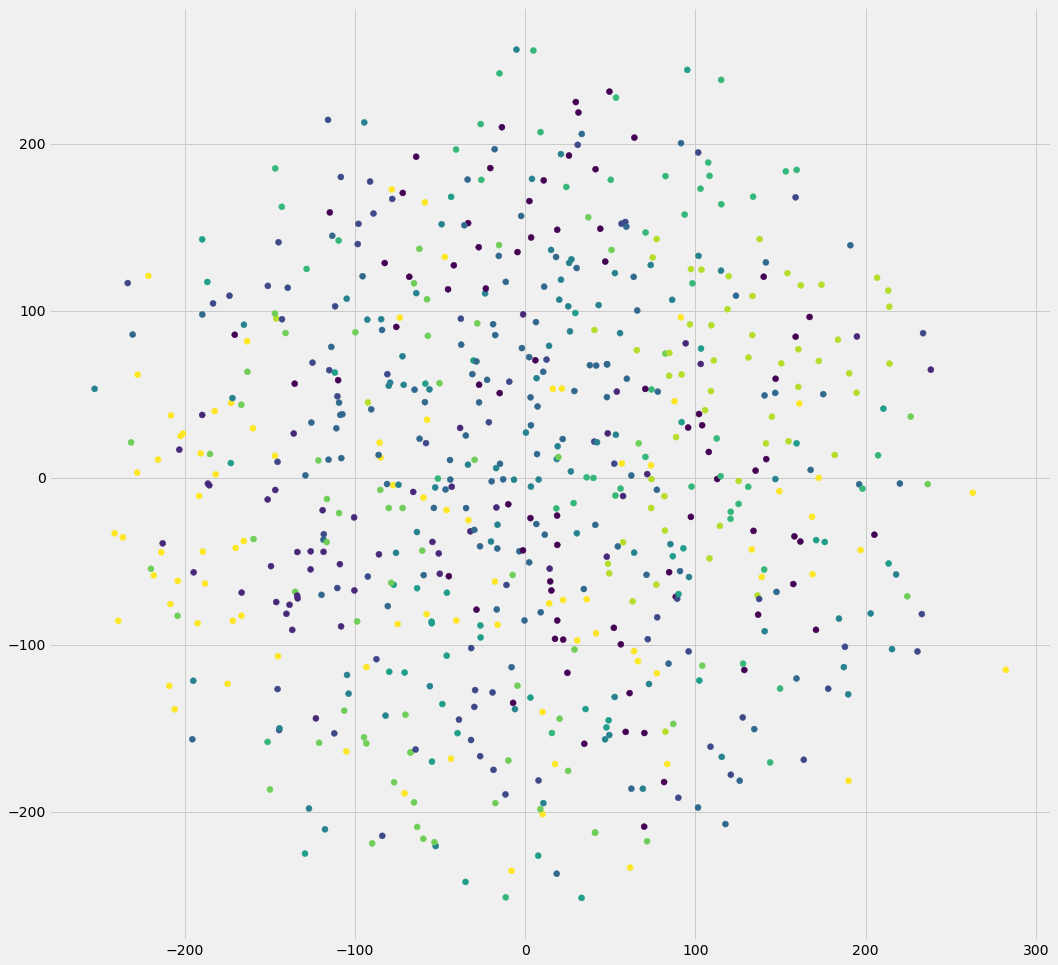

In [84]:
plt.figure(figsize=(16, 16)) 
scatter = plt.scatter(compress_vectors[:,0], compress_vectors[:,1], c=kmeans.labels_.astype(float))
#plt.legend(handles=scatter.legend_elements()[0], labels=kmeans.labels_)
plt.show()

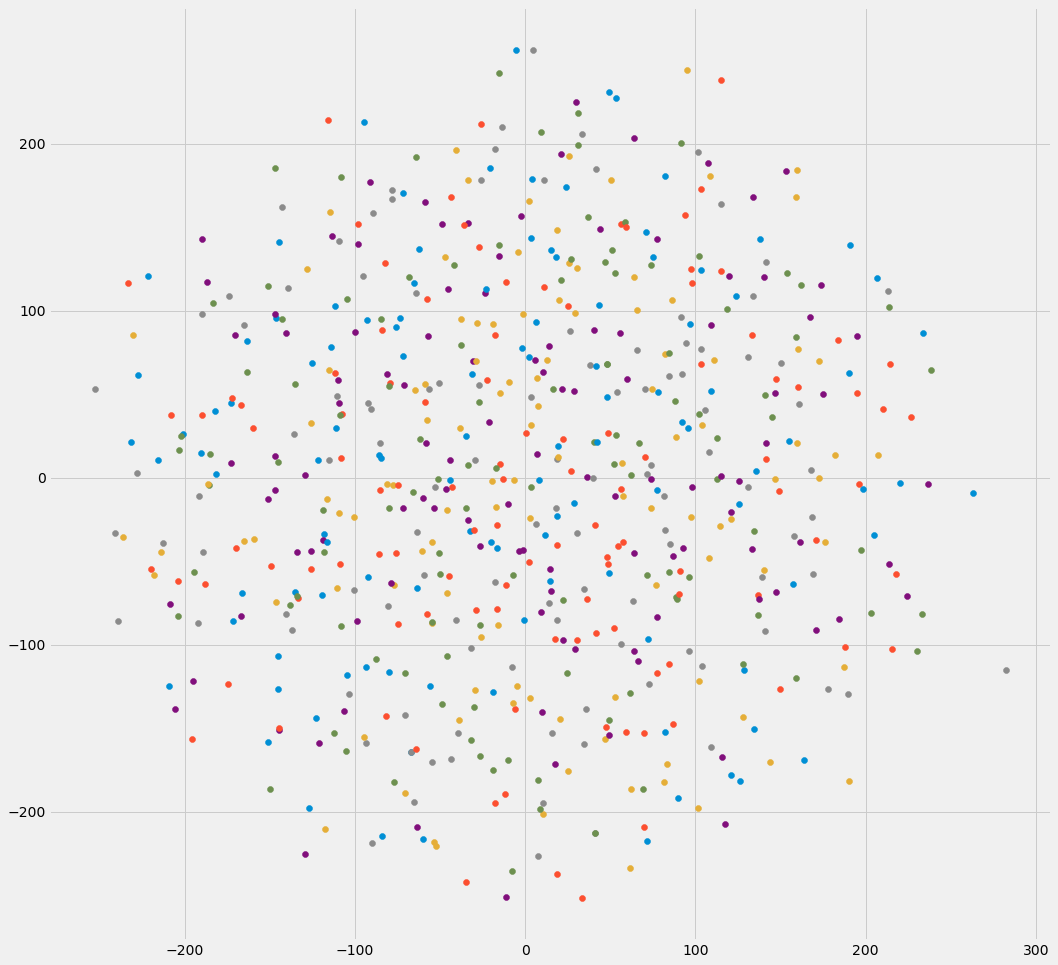

In [78]:
plt.figure(figsize=(16, 16)) 
for v in compress_vectors:
    plt.scatter(v[0],v[1])

plt.show()

### Clustering with HDBSCAN

In [138]:
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [145]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, gen_min_span_tree=True)
clusterer.fit(vectorized_phrases)

/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/hdbscan/hdbscan_.py:217: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


HDBSCAN(gen_min_span_tree=True, min_cluster_size=4)

In [142]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

AttributeError: No minimum spanning tree was generated.This may be due to optimized algorithm variations that skip explicit generation of the spanning tree.

<AxesSubplot:ylabel='distance'>

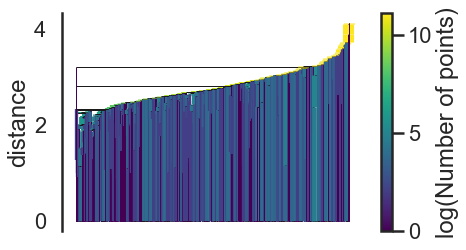

In [146]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [147]:
clusterer.cluster_persistence_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

<AxesSubplot:ylabel='$\\lambda$ value'>

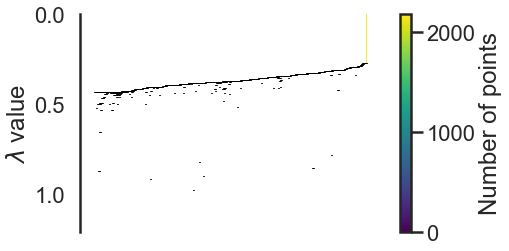

In [148]:
clusterer.condensed_tree_.plot()

In [151]:
len(clusterer.labels_)

2182

/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
